# Steps and Tasks

## 1. Import the translated and pre-processed data set.

In [1]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [4]:
df_data = pd.read_csv(data_file_path)

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


### Visualizing different text features  - Word Cloud

In [6]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Word Cloud for Description & Short description

In [7]:
from wordcloud import WordCloud

def wordplot(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_words = ' '
  #if any common words needs to be filtered can be included here in the if clause
  cleaned_words = ' '.join( [word for word in words.split () if (word != 'hello' and word != 'company') ])
  wordcloud = WordCloud(stopwords = stop_words,
                        max_words=100,
                        background_color = color,
                        scale=3,
                        collocations=False,
                        width = 2500, height = 2500).generate(cleaned_words)
  plt.figure(1, figsize = (8,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

Description - Word cloud


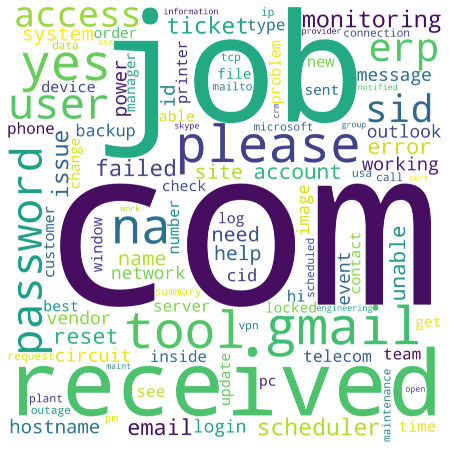

In [8]:
print("Description - Word cloud")
wordplot(df_data['Description'], 'white')

Short Description - Word cloud


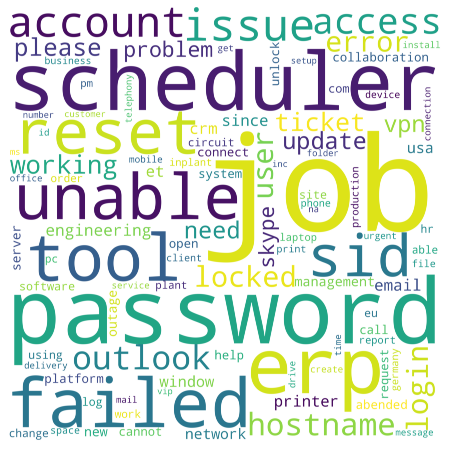

In [9]:
print("Short Description - Word cloud")
wordplot(df_data['Short description'], 'white')

**Both Short Description and Description has similar words, but there are bunch of words addition in both fields, it would be good idea to use both features for ticket classification and assignment**

#### Length of each ticket description 

In [10]:
print("Max length of each ticket description", df_data['Description'].str.len().max())
print("Min length of each ticket description", df_data['Description'].str.len().min()) 
print("Mean length of each ticket description", round(df_data['Description'].str.len().mean(),2)) 
print("Max length of each ticket short description", df_data['Short description'].str.len().max())
print("Min length of each ticket short description", df_data['Short description'].str.len().min()) 
print("Mean length of each ticket short description", round(df_data['Short description'].str.len().mean(),2)) 

Max length of each ticket description 7594
Min length of each ticket description 1
Mean length of each ticket description 164.17
Max length of each ticket short description 973
Min length of each ticket short description 1
Mean length of each ticket short description 41.23


In [11]:
# Total number of words / unique words in a dataset column
def find_total_words_uniq_words(df_column):
  all_words = ''
  for words in df_column :
    all_words += ' '.join([word for word in words.split()])

  print("Total Number of words  in entire dataset for " , df_column.name , ":", len(all_words.split()))

  all_words_unique = set(all_words.split())
  print("Vocabulary Size - Total Number of unique words in dataset for" ,  df_column.name , ":", len(all_words_unique))

In [12]:
find_total_words_uniq_words(df_data['Description'])

find_total_words_uniq_words(df_data['Short description'])

Total Number of words  in entire dataset for  Description : 233583
Vocabulary Size - Total Number of unique words in dataset for Description : 18736
Total Number of words  in entire dataset for  Short description : 51660
Vocabulary Size - Total Number of unique words in dataset for Short description : 10943


**Merging both Description and Short description**

In [13]:
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']
# Strip unwanted spaces
df_data['Desc_All'] = df_data['Desc_All'].apply(lambda x: x.strip())

**Analyzing text statistics after merging both description columns**

sentence length analysis

In [14]:
print("Max length of ticket description", df_data['Desc_All'].str.len().max())
print("Min length of ticket description", df_data['Desc_All'].str.len().min()) 
print("Mean length of ticket description", round(df_data['Desc_All'].str.len().mean(),2)) 
print("Median length of ticket description", round(df_data['Desc_All'].str.len().median(),2)) 
print("Mode length of ticket description", round(df_data['Desc_All'].str.len().mode(),2)) 

Max length of ticket description 7641
Min length of ticket description 3
Mean length of ticket description 206.4
Median length of ticket description 126.0
Mode length of ticket description 0    111
dtype: int64


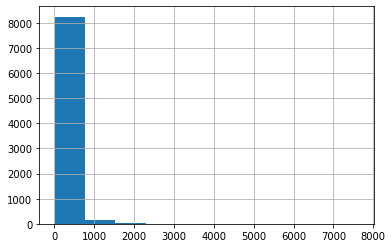

In [15]:
df_data['Desc_All'].str.len().hist()

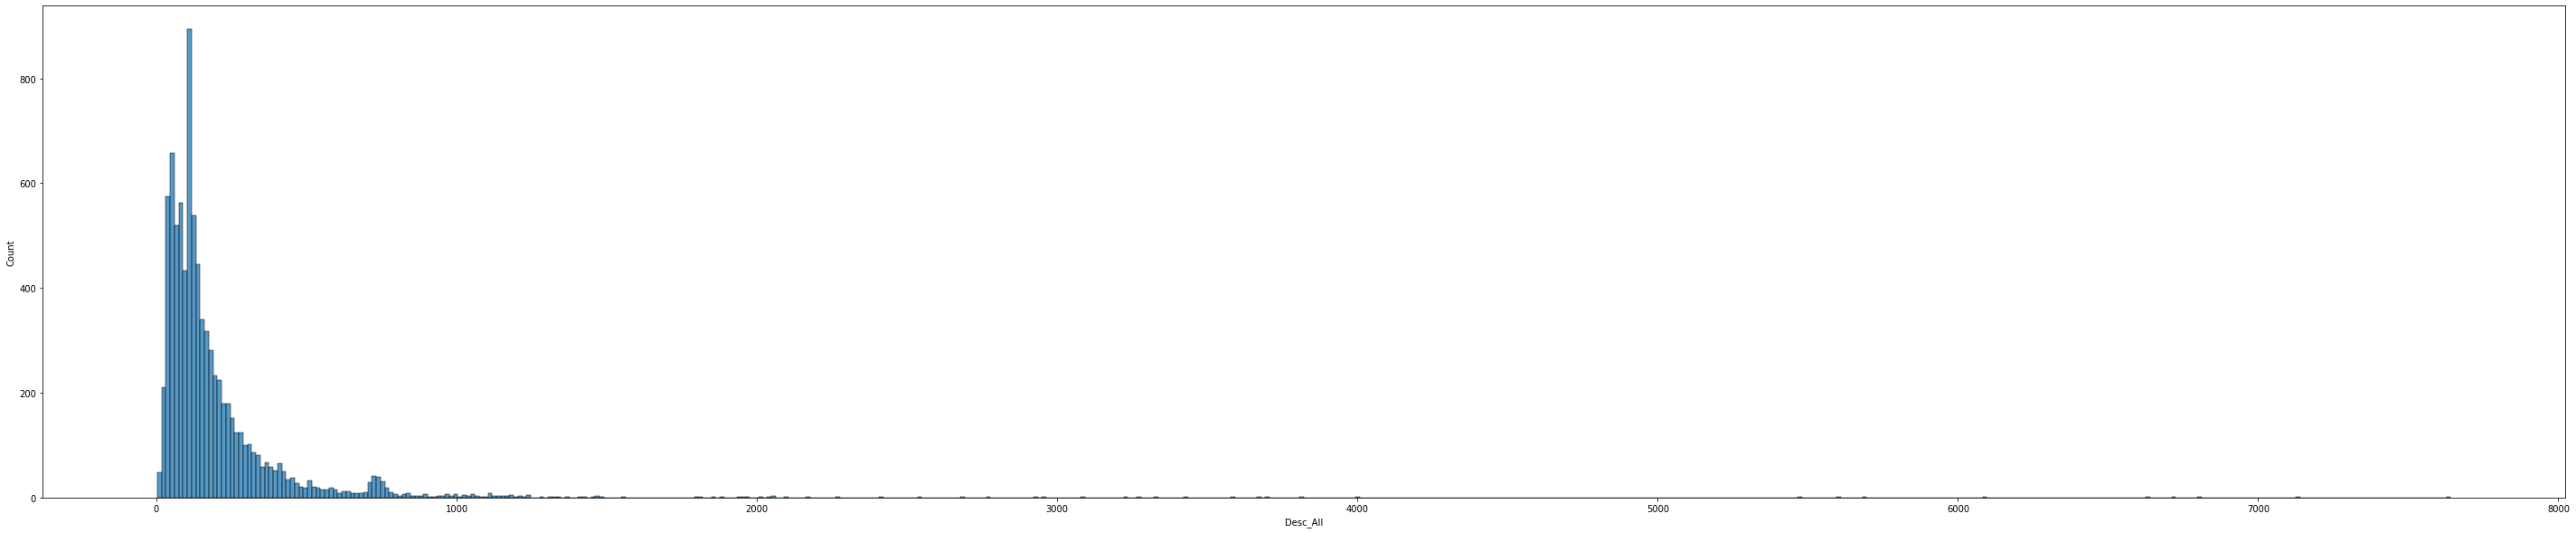

In [16]:
fig2, ax2 = plt.subplots(figsize=(50, 10))
sns.histplot(df_data['Desc_All'].str.len(), ax=ax2)
plt.show()

The histogram shows that description and Short description combined has range range from 3 to ~ 7650 characters and generally most of the tickets has length  between 0 to 250 characters.

### word frequency analysis

Number of words present in each ticket description

In [17]:
# No of words in each ticket descriptions
max_words = df_data['Desc_All'].apply(lambda x: len(x.split())).max()
min_words = df_data['Desc_All'].apply(lambda x: len(x.split())).min()
mean_words = df_data['Desc_All'].apply(lambda x: len(x.split())).mean()

print("Max words in a ticket description ", max_words)
print("Min words in a ticket description", min_words)

print("Avearage words in a ticket description  ", round(mean_words,2))

Max words in a ticket description  1587
Min words in a ticket description 2
Avearage words in a ticket description   35.69


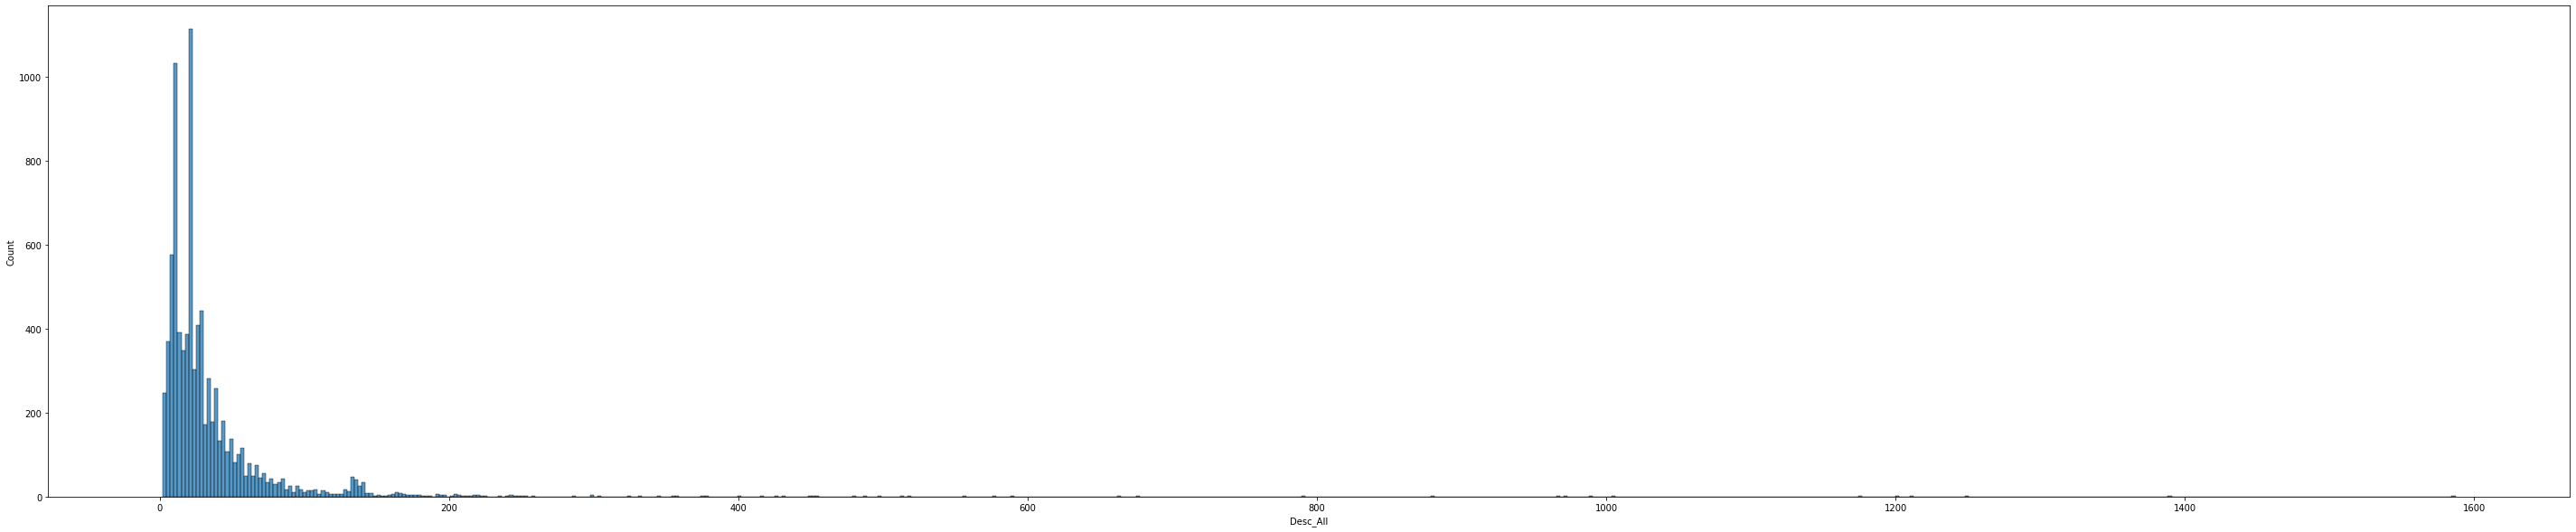

In [18]:
fig3, ax3 = plt.subplots(figsize=(50, 10))
sns.histplot(df_data['Desc_All'].apply(lambda x: len(x.split())), ax = ax3)
plt.show()

Number of words ranges from 2 till ~ 1600 words for a tickets.

Mostly we have a range from 5 to 50 words in a ticket

In [19]:
# Total number of words / unique words in dataset 
find_total_words_uniq_words(df_data['Desc_All'])

Total Number of words  in entire dataset for  Desc_All : 293709
Vocabulary Size - Total Number of unique words in dataset for Desc_All : 20589


**Build Corpus**

In [20]:
corpus=[]
# Series object 
tickets= df_data['Desc_All'].str.split()
tickets_list=tickets.values.tolist()
corpus=[word for ticket in tickets_list for word in ticket]
#print(corpus)
print('corpus word count', len(corpus))
corpus_uniq_words = set(word for word in corpus)
print('unique words count',len(corpus_uniq_words) )

corpus word count 302175
unique words count 14536


**Stop word analysis**

<BarContainer object of 10 artists>

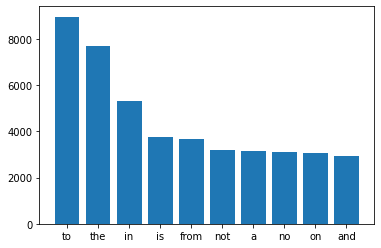

In [21]:
# Top10 Stop words counts

from collections import defaultdict
dic_stop_words=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic_stop_words[word]+=1

top=sorted(dic_stop_words.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)


Top Non Stop words


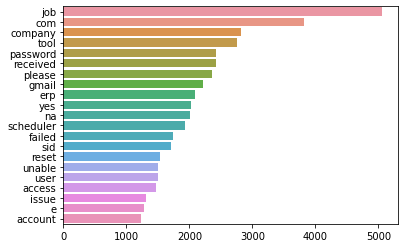

In [22]:
print("Top Non Stop words")
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)


One interesting observation is 'e' word is found in most common occurence word.

In [23]:
# Checking for word 'e' in dataset 

counter = 0
for ticket in tickets_list:
  # using set() + in
  test_list_set = set(ticket)
  if 'e' in test_list_set :
    print ("Element Exists")
    print(ticket)
    counter += 1
    if (counter > 10):
      break

Element Exists
['delivery', 'note', 'can', 't', 'do', 'post', 'goods', 'issue', 'd', 'n', 'plant', 'plant', 'to', 'plant', 'the', 'issue', 'display', 'ekpo', 'sobkz', 'e', 'ekpo', 'umsok', 'ekpo', 'kzbws', 'ekpo', 'kzvbr', 'e', 'note', 'not', 'supported', 'check', 'your', 'entry']
Element Exists
['unable', 'to', 'view', 'payslips', 'from', 'hr', 'tool', 'e', 'time', 'unable', 'to', 'view', 'payslips', 'from', 'hr', 'tool', 'e', 'time']
Element Exists
['intermittent', 'service', 'on', 'configair', 'server', 'in', 'sid', 'requires', 'probably', 'a', 'restart', 'on', 'production', 'server', 'intermittent', 'service', 'on', 'configair', 'server', 'in', 'sid', 'requires', 'probably', 'a', 'restart', 'on', 'production', 'server', 'the', 'error', 'occurs', 'in', 'production', 'and', 'shows', 'internal', 'serrver', 'error', 'error', 'while', 'trying', 'to', 'invoke', 'the', 'method', 'java', 'util', 'list', 'iterator', 'of', 'null', 'object', 'loaded', 'from', 'local', 'variable', 'local', 'li

In [24]:
df_data[df_data['Translated_Description'].str.contains('e4')].head(5)


,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group,Desc_All
201,msd crm,assign crm and e license to nyrjkctu tbhkenlo ...,qmglkaru qiwhfkdv,GRP_22,assign crm and e4 license to nyrjkctu tbhkenlo...,msd crm,en,msd crm,assign crm and e4 license to nyrjkctu tbhkenlo...,GRP_22,msd crm assign crm and e license to nyrjkctu t...
774,urgent please reactive user id dudyhuyv,received from hupnceij hyozjakb gmail com hell...,hupnceij hyozjakb,GRP_33,\n\nreceived from: hupnceij.hyozjakb@gmail.com...,*** urgent *** please reactive user id = dudyh...,en,*** urgent *** please reactive user id = dudyh...,received from: hupnceij.hyozjakb@gmail.com ...,GRP_33,urgent please reactive user id dudyhuyv receiv...
925,ibm pmr s kr problem report from pwr hmc hq co...,from toolonicserviceagent pwr hmc pwr hmc hq c...,jloygrwh acvztedi,GRP_47,\nfrom: toolonicserviceagent_pwr8hmc1@pwr8hmc...,ibm pmr#902s9kr:problem report from pwr8hmc1.h...,en,ibm pmr#902s9kr:problem report from pwr8hmc1.h...,from: toolonicserviceagent_pwr8hmc1@pwr8hmc1...,GRP_47,ibm pmr s kr problem report from pwr hmc hq co...
1106,need access to sharepont approved by blktuiae ...,need access to collaboration platform approved...,tigwlquj evynjiar,GRP_16,need access to collaboration_platform approved...,need access to sharepont approved by blktuiae ...,en,need access to sharepont approved by blktuiae ...,need access to collaboration_platform approved...,GRP_16,need access to sharepont approved by blktuiae ...
1210,password reset request for erp,received from irqpwgtn dpautgeh gmail com dear...,irqpwgtn dpautgeh,GRP_0,\n\nreceived from: irqpwgtn.dpautgeh@gmail.com...,password reset request for erp,en,password reset request for erp,received from: irqpwgtn.dpautgeh@gmail.com ...,GRP_0,password reset request for erp received from i...


We could see that reason for words like e formed due to processing like e4 license, e5 license, e-mail, removing numbers in mac address.

#### Visualizing different patterns  ---Visualizing n-gram / LDA / tSNE plots

**Ngram exploration**

Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.

If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

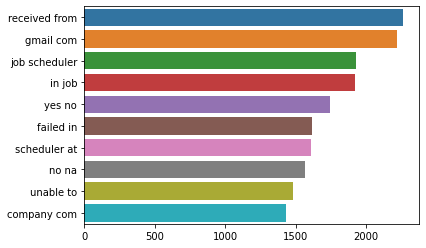

In [26]:
n=2 # bigram 
plot_top_ngrams_barchart(df_data['Desc_All'],n)

'job scheduler', 'job', 'failed in' , 'unable to', 'gmail com' indicating issues in Jobs and also unable to access gmail com 

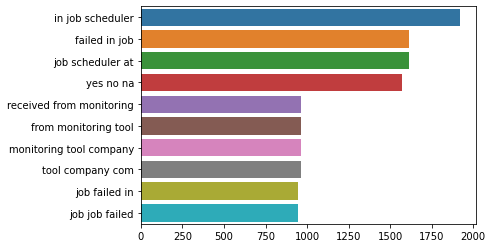

In [27]:
n=3 # trigram
plot_top_ngrams_barchart(df_data['Desc_All'],n)

Repeated combinations for group of words ' Job scheduler at' , 'from monitoring tool', ' job failed in ' 

**Topic modeling exploration with pyLDAvis**

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

In [28]:
# moved this installation to initial block of program
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 87.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [29]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=08248a05abbbc62b7d2d50bba9b1eb5aacbec44c91b7c6c6e4e5cf717dfcf0c2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [32]:
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models



def get_lda_objects(text, num_topics = 4):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = num_topics, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [33]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [34]:
lda_model, bow_corpus, dic = get_lda_objects(df_data['Desc_All'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
lda_model.show_topics()

[(0,
  '0.022*"com" + 0.020*"gmail" + 0.017*"please" + 0.014*"issue" + 0.013*"tool" + 0.012*"unable" + 0.012*"received" + 0.012*"access" + 0.012*"erp" + 0.010*"user"'),
 (1,
  '0.154*"job" + 0.058*"scheduler" + 0.046*"failed" + 0.037*"tool" + 0.037*"company" + 0.036*"com" + 0.032*"received" + 0.030*"monitoring" + 0.019*"hostname" + 0.016*"abended"'),
 (2,
  '0.073*"password" + 0.053*"yes" + 0.043*"reset" + 0.021*"site" + 0.020*"company" + 0.019*"erp" + 0.019*"circuit" + 0.018*"power" + 0.018*"ticket" + 0.014*"vendor"'),
 (3,
  '0.023*"account" + 0.014*"locked" + 0.013*"login" + 0.010*"device" + 0.009*"please" + 0.009*"com" + 0.009*"inside" + 0.008*"user" + 0.008*"event" + 0.008*"software"')]

In [36]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.072204  0.134661       1        1  45.619646
3     -0.029167  0.152029       2        1  22.022844
2     -0.183850 -0.204505       3        1  17.306910
1      0.285222 -0.082185       4        1  15.050600, topic_info=           Term         Freq        Total Category  logprob  loglift
198         job  4476.000000  4476.000000  Default  30.0000  30.0000
12     password  2444.000000  2444.000000  Default  29.0000  29.0000
225   scheduler  1695.000000  1695.000000  Default  28.0000  28.0000
348         yes  1802.000000  1802.000000  Default  27.0000  27.0000
223      failed  1345.000000  1345.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3207       host    75.440503   143.827748   Topic4  -5.9541   1.2485
51        event   125.574029   485.966913   Topic4  -5.4446   0.5405
321         inc    76.936026   210.463596   Topic4  -5.9345   0.8874
65       ticket    80.934626  1139.117157   Topic4  -5.8838  -0.7506
45        error    69.505263  1085.754917   Topic4  -6.0361  -0.8549

[284 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
10103      4  0.999403  abended
41         1  0.740612   access
41         2  0.197402   access
41         3  0.061067   access
41         4  0.000710   access
...      ...       ...      ...
11743      2  0.977004      xed
348        1  0.000555      yes
348        2  0.009987      yes
348        3  0.988132      yes
348        4  0.001664      yes

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

GRP_0        3976
GRP_8         661
GRP_24        289
GRP_12        257

In [37]:
lda_model_GP0, bow_corpus_GP0, dic_GP0 = get_lda_objects(df_data[df_data['Assignment group'] == 'GRP_0']['Desc_All'])
print(lda_model_GP0.show_topics())
plot_lda_vis(lda_model_GP0, bow_corpus_GP0, dic_GP0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[(0, '0.030*"com" + 0.028*"gmail" + 0.025*"issue" + 0.020*"received" + 0.020*"outlook" + 0.018*"tool" + 0.015*"crm" + 0.014*"engineering" + 0.013*"please" + 0.013*"image"'), (1, '0.099*"password" + 0.051*"reset" + 0.036*"erp" + 0.021*"unable" + 0.021*"com" + 0.021*"tool" + 0.020*"sid" + 0.018*"gmail" + 0.016*"please" + 0.016*"user"'), (2, '0.023*"unable" + 0.021*"com" + 0.020*"email" + 0.019*"outlook" + 0.017*"gmail" + 0.016*"vpn" + 0.014*"company" + 0.012*"access" + 0.011*"connect" + 0.011*"please"'), (3, '0.074*"account" + 0.041*"locked" + 0.040*"user" + 0.039*"ticket" + 0.035*"update" + 0.032*"erp" + 0.025*"login" + 0.022*"sid" + 0.020*"unlock" + 0.019*"issue"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.134466  0.034164       1        1  32.614051
1     -0.036229 -0.167242       2        1  28.824114
0      0.101918  0.052912       3        1  22.067390
3     -0.200155  0.080166       4        1  16.494446, topic_info=        Term         Freq        Total Category  logprob  loglift
12  password  1942.000000  1942.000000  Default  30.0000  30.0000
89   account   884.000000   884.000000  Default  29.0000  29.0000
13     reset  1009.000000  1009.000000  Default  28.0000  28.0000
91    locked   503.000000   503.000000  Default  27.0000  27.0000
52    ticket   477.000000   477.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
10   manager    52.334649   220.332441   Topic4  -5.3549   0.3647
30    please    62.584461   805.368168   Topic4  -5.1760  -0.7526
76      help    53.348432   405.220741   Topic4  -5.3357  -0.2254
20       com    56.087456  1377.641119   Topic4  -5.2856  -1.3991
23     gmail    53.152881  1174.675043   Topic4  -5.3394  -1.2934

[302 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.280477      able
0         2  0.221773      able
0         3  0.208727      able
0         4  0.293523      able
41        1  0.525388    access
...     ...       ...       ...
87        3  0.208693   working
87        4  0.061380   working
251       4  0.890031  yhmwxsqj
5971      4  0.890714  zqbmxdgy
2795      3  0.951590  zwirhcol

[587 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

In [38]:
print('\n' , lda_model_GP0.show_topics()[0], '\n', lda_model_GP0.show_topics()[1], '\n', lda_model_GP0.show_topics()[2],'\n', lda_model_GP0.show_topics()[3])


 (0, '0.030*"com" + 0.028*"gmail" + 0.025*"issue" + 0.020*"received" + 0.020*"outlook" + 0.018*"tool" + 0.015*"crm" + 0.014*"engineering" + 0.013*"please" + 0.013*"image"') 
 (1, '0.099*"password" + 0.051*"reset" + 0.036*"erp" + 0.021*"unable" + 0.021*"com" + 0.021*"tool" + 0.020*"sid" + 0.018*"gmail" + 0.016*"please" + 0.016*"user"') 
 (2, '0.023*"unable" + 0.021*"com" + 0.020*"email" + 0.019*"outlook" + 0.017*"gmail" + 0.016*"vpn" + 0.014*"company" + 0.012*"access" + 0.011*"connect" + 0.011*"please"') 
 (3, '0.074*"account" + 0.041*"locked" + 0.040*"user" + 0.039*"ticket" + 0.035*"update" + 0.032*"erp" + 0.025*"login" + 0.022*"sid" + 0.020*"unlock" + 0.019*"issue"')


In [39]:
lda_model_GP8, bow_corpus_GP8, dic_GP8 = get_lda_objects(df_data[df_data['Assignment group'] == 'GRP_0']['Desc_All'])
print('\n' , lda_model_GP8.show_topics(), '\n')
plot_lda_vis(lda_model_GP8, bow_corpus_GP8, dic_GP8)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

 [(0, '0.038*"unable" + 0.029*"com" + 0.026*"gmail" + 0.018*"vpn" + 0.017*"received" + 0.016*"outlook" + 0.015*"skype" + 0.011*"connect" + 0.011*"working" + 0.011*"open"'), (1, '0.057*"account" + 0.035*"locked" + 0.034*"erp" + 0.029*"com" + 0.024*"gmail" + 0.020*"sid" + 0.019*"please" + 0.018*"unlock" + 0.014*"user" + 0.012*"window"'), (2, '0.109*"password" + 0.053*"reset" + 0.045*"tool" + 0.035*"erp" + 0.022*"sid" + 0.019*"login" + 0.015*"engineering" + 0.013*"user" + 0.012*"management" + 0.012*"unable"'), (3, '0.028*"ticket" + 0.025*"update" + 0.025*"user" + 0.025*"issue" + 0.022*"outlook" + 0.015*"email" + 0.013*"access" + 0.013*"company" + 0.012*"crm" + 0.012*"com"')] 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.085525 -0.043123       1        1  31.620016
3     -0.128860  0.022154       2        1  23.611613
2      0.119133 -0.118520       3        1  23.345445
1      0.095251  0.139488       4        1  21.422926, topic_info=         Term         Freq        Total Category  logprob  loglift
12   password  1942.000000  1942.000000  Default  30.0000  30.0000
89    account   898.000000   898.000000  Default  29.0000  29.0000
13      reset  1006.000000  1006.000000  Default  28.0000  28.0000
43       tool   772.000000   772.000000  Default  27.0000  27.0000
91     locked   510.000000   510.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
76       help    61.125014   403.689149   Topic4  -5.4610  -0.3470
173     email    61.314553   525.049970   Topic4  -5.4579  -0.6068
24      hello    54.862054   337.571681   Topic4  -5.5691  -0.2762
113   message    52.633956   256.623871   Topic4  -5.6106  -0.0435
8       issue    56.548919   763.769556   Topic4  -5.5389  -1.0625

[306 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.316434      able
0         2  0.271229      able
0         3  0.361639      able
0         4  0.048434      able
41        1  0.286985    access
...     ...       ...       ...
87        3  0.184196   working
87        4  0.081529   working
251       3  0.862975  yhmwxsqj
4523      2  0.940567  zdsxmcwu
2795      1  0.945727  zwirhcol

[556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

In [40]:
print('\n' , lda_model_GP8.show_topics()[0], '\n', lda_model_GP8.show_topics()[1], '\n', lda_model_GP8.show_topics()[2],'\n', lda_model_GP8.show_topics()[3])


 (0, '0.038*"unable" + 0.029*"com" + 0.026*"gmail" + 0.018*"vpn" + 0.017*"received" + 0.016*"outlook" + 0.015*"skype" + 0.011*"connect" + 0.011*"working" + 0.011*"open"') 
 (1, '0.057*"account" + 0.035*"locked" + 0.034*"erp" + 0.029*"com" + 0.024*"gmail" + 0.020*"sid" + 0.019*"please" + 0.018*"unlock" + 0.014*"user" + 0.012*"window"') 
 (2, '0.109*"password" + 0.053*"reset" + 0.045*"tool" + 0.035*"erp" + 0.022*"sid" + 0.019*"login" + 0.015*"engineering" + 0.013*"user" + 0.012*"management" + 0.012*"unable"') 
 (3, '0.028*"ticket" + 0.025*"update" + 0.025*"user" + 0.025*"issue" + 0.022*"outlook" + 0.015*"email" + 0.013*"access" + 0.013*"company" + 0.012*"crm" + 0.012*"com"')


In [41]:
lda_model_GP24, bow_corpus_GP24, dic_GP24 = get_lda_objects(df_data[df_data['Assignment group'] == 'GRP_24']['Desc_All'])
print('\n' , lda_model_GP24.show_topics(), '\n')
plot_lda_vis(lda_model_GP24, bow_corpus_GP24, dic_GP24)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

 [(0, '0.043*"problem" + 0.020*"tool" + 0.018*"please" + 0.014*"printer" + 0.013*"access" + 0.010*"room" + 0.010*"point" + 0.009*"calculator" + 0.009*"defective" + 0.009*"siavgtby"'), (1, '0.049*"problem" + 0.043*"ewew" + 0.038*"install" + 0.024*"wnkpzcmv" + 0.024*"jionmpsf" + 0.020*"vzqomdgt" + 0.020*"jwoqbuml" + 0.014*"support" + 0.014*"work" + 0.013*"mit"'), (2, '0.028*"setup" + 0.025*"new" + 0.018*"problem" + 0.016*"qzhgdoua" + 0.016*"tmqfjard" + 0.014*"monitor" + 0.014*"printer" + 0.012*"defective" + 0.011*"csenjruz" + 0.009*"bqmjyprz"'), (3, '0.066*"setup" + 0.059*"new" + 0.036*"problem" + 0.022*"calculator" + 0.022*"probleme" + 0.020*"mit" + 0.018*"wrcktgbd" + 0.018*"wzrgyunp" + 0.018*"niptbwdq" + 0.017*"csenjruz"')] 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.192101  0.085836       1        1  34.264379
3      0.134620  0.115410       2        1  26.770452
0     -0.030755 -0.157238       3        1  20.236932
2      0.088235 -0.044009       4        1  18.728237, topic_info=           Term       Freq      Total Category  logprob  loglift
47        setup  75.000000  75.000000  Default  30.0000  30.0000
121         new  66.000000  66.000000  Default  29.0000  29.0000
38      install  43.000000  43.000000  Default  28.0000  28.0000
27     wnkpzcmv  27.000000  27.000000  Default  27.0000  27.0000
22     jionmpsf  27.000000  27.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
75   calculator   4.403280  42.843565   Topic4  -4.9165  -0.6001
148      defekt   3.181181   9.435455   Topic4  -5.2416   0.5879
68       please   3.408743  22.241004   Topic4  -5.1725  -0.2005
146         mit   3.107451  34.194102   Topic4  -5.2651  -0.7231
34     probleme   3.074575  29.184124   Topic4  -5.2757  -0.5753

[221 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
237       4  0.768252   abholen
346       1  0.211047    access
346       3  0.562792    access
346       4  0.211047    access
368       1  0.754357   account
...     ...       ...       ...
186       2  0.741715  xpugntjv
120       1  0.925120  xwirzvda
202       4  0.853209      year
551       1  0.866720     zebra
37        1  0.942824  zlqfptjx

[246 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [42]:
print('\n' , lda_model_GP24.show_topics()[0], '\n', lda_model_GP24.show_topics()[1], '\n', lda_model_GP24.show_topics()[2],'\n', lda_model_GP24.show_topics()[3])


 (0, '0.043*"problem" + 0.020*"tool" + 0.018*"please" + 0.014*"printer" + 0.013*"access" + 0.010*"room" + 0.010*"point" + 0.009*"calculator" + 0.009*"defective" + 0.009*"siavgtby"') 
 (1, '0.049*"problem" + 0.043*"ewew" + 0.038*"install" + 0.024*"wnkpzcmv" + 0.024*"jionmpsf" + 0.020*"vzqomdgt" + 0.020*"jwoqbuml" + 0.014*"support" + 0.014*"work" + 0.013*"mit"') 
 (2, '0.028*"setup" + 0.025*"new" + 0.018*"problem" + 0.016*"qzhgdoua" + 0.016*"tmqfjard" + 0.014*"monitor" + 0.014*"printer" + 0.012*"defective" + 0.011*"csenjruz" + 0.009*"bqmjyprz"') 
 (3, '0.066*"setup" + 0.059*"new" + 0.036*"problem" + 0.022*"calculator" + 0.022*"probleme" + 0.020*"mit" + 0.018*"wrcktgbd" + 0.018*"wzrgyunp" + 0.018*"niptbwdq" + 0.017*"csenjruz"')


### Visualizing Word Vectors with t-SNE



● Text preprocessing
include lemmatization

In [43]:

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
    
def preprocess_vocab(df_column):
    corpus=[]
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
        words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)

    df_column = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return corpus,df_column

tickets_list,df_column = preprocess_vocab(df_data['Desc_All'])
df_data['desc_processed'] = df_column


In [44]:
print(tickets_list[0])
print(df_data['Desc_All'][0])

['login', 'issue', 'verified', 'user', 'detail', 'employee', 'manager', 'name', 'checked', 'user', 'name', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved']
login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved


In [45]:
corpus=[]
corpus=[word for ticket in tickets_list for word in ticket]
#print(corpus)
print('corpus word count', len(corpus))
corpus_uniq_words = set(word for word in corpus)
print('unique words count',len(corpus_uniq_words) )

corpus word count 193152
unique words count 13404


In [46]:
tickets_list[0]

['login',
 'issue',
 'verified',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'checked',
 'user',
 'name',
 'reset',
 'password',
 'advised',
 'user',
 'login',
 'check',
 'caller',
 'confirmed',
 'able',
 'login',
 'issue',
 'resolved']

In [47]:
# load the word2vec algorithm from the gensim library  
from gensim.models import word2vec  
# run the model  
#model = word2vec.Word2Vec(tickets_list, vector_size=100, window=5, min_count=100, workers=4)  
model = word2vec.Word2Vec(tickets_list, vector_size=100, window=5, min_count=50, workers=4) 

In [48]:
#len(model.wv.vocab)
#AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
#Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
#See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

len(model.wv.key_to_index)


553

In [49]:
# Top 10 words
[x for x in model.wv.key_to_index][0:10]  

['job',
 'com',
 'tool',
 'company',
 'password',
 'received',
 'please',
 'gmail',
 'erp',
 'yes']

In [50]:
model.wv['login']

array([-0.01199739,  0.7808466 , -1.0692885 ,  0.2942616 ,  1.6806492 ,
       -0.15767007,  1.4510671 ,  0.5416803 ,  0.0519552 ,  0.05891011,
       -0.32264692, -1.286564  ,  0.6656834 , -0.5055699 , -0.31263798,
       -0.6928918 ,  0.03650021,  0.594704  ,  0.40374574, -1.0191627 ,
        0.19033647,  0.93144053, -0.15100242,  1.3042583 ,  0.27811396,
       -0.2692856 , -0.8073044 , -0.12952876, -0.3694097 , -1.0504732 ,
        0.33178985,  0.04966756,  0.32741147, -0.93815756,  0.3873908 ,
       -0.39181888,  0.7069692 ,  0.44740295,  0.54064363, -0.60486245,
       -0.8562167 , -0.7508069 , -0.9373621 ,  0.23637013,  0.4981087 ,
       -0.4992487 , -0.2050025 ,  0.17369254,  1.1671247 , -0.16738208,
       -0.232823  , -0.647585  ,  0.36295095, -0.50597596, -0.20235683,
       -0.5112554 , -0.04415846, -0.9513497 ,  0.9726517 ,  0.8034741 ,
       -0.232501  , -0.484431  ,  0.97133243, -0.03076017, -1.2211506 ,
        0.23117389, -0.11084446,  1.0914656 , -0.14957748,  0.82

In [51]:
# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('login')]  

[('caller', 0.91),
 ('confirmed', 0.88),
 ('es', 0.88),
 ('resolved', 0.87),
 ('logging', 0.84),
 ('advised', 0.82),
 ('hub', 0.81),
 ('able', 0.8),
 ('teamviewer', 0.8),
 ('sync', 0.79)]

In [52]:
# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('laptop')]  

[('computer', 0.83),
 ('dell', 0.8),
 ('wifi', 0.78),
 ('office', 0.77),
 ('old', 0.77),
 ('room', 0.71),
 ('setup', 0.71),
 ('calculator', 0.69),
 ('work', 0.69),
 ('anymore', 0.69)]

In [53]:
# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('erp')] 

[('logon', 0.88),
 ('hrp', 0.85),
 ('sid', 0.84),
 ('mii', 0.77),
 ('production', 0.77),
 ('transaction', 0.77),
 ('slow', 0.77),
 ('locked', 0.76),
 ('lock', 0.74),
 ('many', 0.72)]

In [54]:

# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('mit')] 

[('engineer', 0.88),
 ('image', 0.85),
 ('jpg', 0.84),
 ('png', 0.84),
 ('best', 0.82),
 ('cid', 0.81),
 ('kind', 0.8),
 ('shared', 0.8),
 ('partner', 0.7),
 ('mailto', 0.69)]

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map

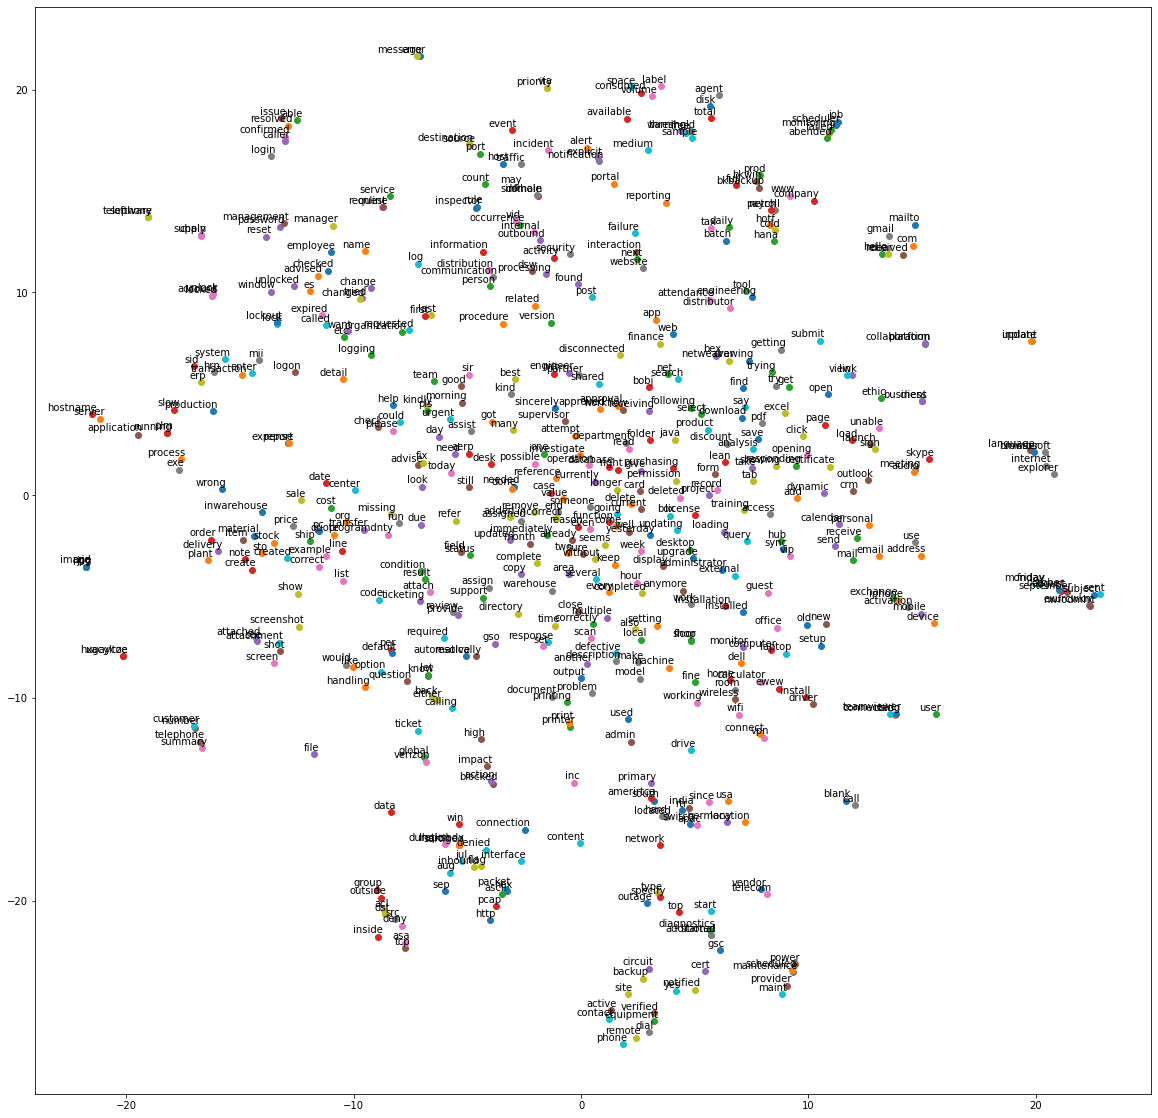

In [55]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):
  "Creates a TSNE model and plots it"  
  labels = []
  tokens = []

  for word in model.wv.key_to_index:
    tokens.append(model.wv[word])
    labels.append(word)

  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)  
  new_values = tsne_model.fit_transform(tokens)  

  x = []  
  y = []  
  for value in new_values:  
    x.append(value[0])  
    y.append(value[1])  

  plt.figure(figsize=(20, 20))   
  for i in range(len(x)):  
    plt.scatter(x[i],y[i])  
    plt.annotate(labels[i],  
    xy=(x[i], y[i]),  
    xytext=(5, 2),  
    textcoords='offset points',  
    ha='right',  
    va='bottom')  
  plt.show()  
  
# call the function on our dataset  
tsne_plot(model)  

t-SNE model has picked up some interesting word clusters. At the top, circled in red, I have highlighted a cluster of words that appears to indicate recommended food pairings. Words in this cluster include: pasta, lamb, game, fish, mushroom etc.

A second cluster of words is indicated on the left-hand side with a green circle. This cluster of words appears to indicate fruit, and includes words such as: citrus, apple, orange, grapefruit, lime, melon, etc.

A third cluster of words is indicated on the bottom of the figure with a pink circle. These words appear to indicate scent, and include: aromatic, nose, bouquet, scent, fragrant, perfume, etc.

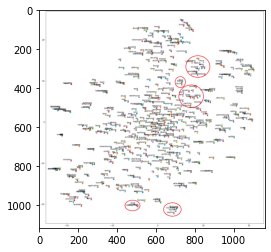

In [56]:
import matplotlib.image as mpimg
im = mpimg.imread("/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/tSNE Plot.png")

plt.imshow(im)

In [57]:
print("EDA part completed")

EDA part completed
